# Исследование надёжности заёмщиков

Для кредитного скоринга необходимо ответить на вопрос, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

## Шаг 1. Загрузка файла с данными и изучение датасета

In [ ]:
import pandas as pd
df = pd.read_csv('/datasets/data.csv')
df.head(50)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [ ]:
#Посмотрим значения интересующих нас колонок
df['days_employed'].value_counts()

-986.927316     1
-7026.359174    1
-4236.274243    1
-6620.396473    1
-1238.560080    1
               ..
-2849.351119    1
-5619.328204    1
-448.829898     1
-1687.038672    1
-582.538413     1
Name: days_employed, Length: 19351, dtype: int64

In [ ]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [ ]:
df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [ ]:
df['total_income'].value_counts()

112874.418757    1
133912.272223    1
182036.676828    1
122421.963500    1
198271.837248    1
                ..
133299.194693    1
115080.782380    1
84896.781597     1
153838.839212    1
150014.128510    1
Name: total_income, Length: 19351, dtype: int64

In [ ]:
df['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [ ]:
df['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Название колонок (формат вывода и содержание) нас устраивает, менять ничего не требуется. С отрицательными значениями в столбце days_employed, которые сразу бросаются в глаза, придется побороться. С запредельным трудовым стажем делать ничего не будем, есть вероятность, что у таких людей была вредная или опасная работа, где 1 год считается за 2 или 3. 

Так же видно, что NaN есть только в двух колонках: стаж и доход, причем если значения отсутствуют, то сразу в обоих. 

Предполагаемых причин может быть несколько, например:

1.Такие клиенты банка не имеют официальной работы.

2.Клиенты по какой-то причине скрывают свои данные.

3.Это ошибка.

Исходя из этого, считаем логичным заполнить эти NaN медианами,  а не избавиться.
В стобце children видим значения -1. Будем считать это ошибкой при заполнении данных. Исправим на 1.

В столбце education и family_status значения прописаны разным регистром, нужно будет их привести к единому - нижнему.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Шаг 2. Предобработка данных

### Обработка пропусков

In [ ]:
#Проверим нашу догадку

df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [ ]:
#В столбцах days_employed и total_income мы видим долю пропущенных значений, и это 10%. 
#Избавимся от отрицательных значений и проверим, все ли получилось

df[['days_employed', 'children']] = df[['days_employed', 'children']].abs()


In [ ]:
df['days_employed'].value_counts()

986.927316     1
7026.359174    1
4236.274243    1
6620.396473    1
1238.560080    1
              ..
2849.351119    1
5619.328204    1
448.829898     1
1687.038672    1
582.538413     1
Name: days_employed, Length: 19351, dtype: int64

In [ ]:
df['children'].value_counts()

0.0     14149
1.0      4865
2.0      2055
3.0       330
20.0       76
4.0        41
5.0         9
Name: children, dtype: int64

In [ ]:
df['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

In [ ]:
df.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64

In [ ]:
df.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

In [ ]:
df['total_income'] = df.groupby('income_type')['total_income'].apply(lambda income_type: income_type.fillna(income_type.median()))
df['days_employed'] = df.groupby('income_type')['days_employed'].apply(lambda days_employed: days_employed.fillna(days_employed.median()))

In [ ]:
df.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1.0,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1.0,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0.0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3.0,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0.0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0.0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0.0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0.0,152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2.0,6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0.0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [ ]:
#Мы заполнили медианными значениями столбцы days_employed и total_income по каждому типу занятости.
#Тем самым избавились от NaN

In [ ]:
#Удалены ли пропуски?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null float64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


In [ ]:
df['days_employed'].isna().mean()

0.0

In [ ]:
df['total_income'].isna().mean()

0.0

**Вывод**

Конечно, не стоило так сразу избавляться от отрицательных значений в столбце days_employed. 
В первую очередь стоит выяснить у заказчика, с чем они могут быть связаны, и далее принимать решение о том,
как и стоит ли их обрабатывать.
Если значения неправильно записаны из-за некоторого сбоя и лежат с ошибкой в БД,
приведение их к модулю будет иметь нежелательные последствия.

### Замена типа данных

In [ ]:
#Проверим, в каких столбцах следует поменять тип данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null float64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 2.0+ MB


In [ ]:
df['children'] = df['children'].astype('int')

In [ ]:
df['days_employed'] = df['days_employed'].astype('int')

In [ ]:
df['total_income'] = df['total_income'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

В изначальных данных столбец children имел значения int, что логично.
После применения метода abs() значение поменялось на float, что несложно исправить применением метода astype().

### Обработка дубликатов

In [ ]:
#Приведем значения в столбце education к нижнему регистру.

df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()

In [ ]:
df.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование
8,2,6929,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи


In [ ]:
#Узнаем, какое количество дубликатов есть в наших данных и удалим их

df.duplicated().sum()

71

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

**Вывод**

Дубликаты могут повлиять на выводы, поэтому их также стоит обрабатывать наряду с пропущенными значениями. От них  несложно избавиться с помощью метода drop_duplicates().

### Лемматизация

In [ ]:
#Для лемматизации загрузим дополнительные библиотеки.
#Выделим из столбца purpose фразы и оценим, как они сформулированы.
#Наша цель - объединить фразы с единым смыслом.

from pymystem3 import Mystem
m = Mystem()

purpose_list = df['purpose'].unique()
lemma_dict=[] 
for i in purpose_list:
    lemma = ' '.join(m.lemmatize(i))
    lemma_dict.append(lemma)
from collections import Counter
Counter(lemma_dict)    


Counter({'покупка   жилье \n': 1,
         'приобретение   автомобиль \n': 1,
         'дополнительный   образование \n': 1,
         'сыграть   свадьба \n': 1,
         'операция   с   жилье \n': 1,
         'образование \n': 1,
         'на   проведение   свадьба \n': 1,
         'покупка   жилье   для   семья \n': 1,
         'покупка   недвижимость \n': 1,
         'покупка   коммерческий   недвижимость \n': 1,
         'покупка   жилой   недвижимость \n': 1,
         'строительство   собственный   недвижимость \n': 1,
         'недвижимость \n': 1,
         'строительство   недвижимость \n': 1,
         'на   покупка   подержать   автомобиль \n': 1,
         'на   покупка   свой   автомобиль \n': 1,
         'операция   с   коммерческий   недвижимость \n': 1,
         'строительство   жилой   недвижимость \n': 1,
         'жилье \n': 1,
         'операция   со   свой   недвижимость \n': 1,
         'автомобиль \n': 2,
         'заниматься   образование \n': 1,
         'сделка   с

In [ ]:
#Таким образом мы создали словарь с леммами, который можно было бы разбить на отдельные слова.
#Но и из этого списка уже можно выделить ключевые слова, относящеся к целям кредита и пригодные для анализа.

In [ ]:
#Напишем функцию, которая выведет основные категории из фраз, полученных лемматизацией,
#применим ее и посчитаем количество кредитов, взятых по выделенным категорям.

def all_purposes(words):
    words = m.lemmatize(words)
    if ('недвижимость' in words) or ('жилье' in words):
        return 'недвижимость'
    if 'образование' in words:
        return 'образование'
    if 'свадьба' in words:
        return 'свадьба'
    if 'автомобиль' in words:
        return 'автомобиль'

df['common_purpose'] = df['purpose'].apply(all_purposes)
df['common_purpose'].value_counts()
  
    
 


недвижимость    10840
автомобиль       4315
образование      4022
свадьба          2348
Name: common_purpose, dtype: int64

**Вывод**

С помощью лемматизации был получен список основных целей взятия кредитов клиентами банка.
Также мы вывели количнство кредитов по каждой цели.
Самыми популярными целями являются операции с недвижимостью и автомобилем.

### Категоризация данных

In [ ]:
#Будем категоризировать данные в соответствие с поставленными заказчиком целями.
#Для начала выясним, сколько в нашей выборке клиентов, имеющих и не имеющих детей.
#Напишем функцию, которая сопоставит количество детей с группами "бездетные", "1-2 ребенка" и "многодетные".
#Затем сгруппируем данные в сводную таблицу, чтобы увидеть зависимость факта погашения кредита в срок
#от наличия и количества детей в семье. 

def map_children(children_count):
    if children_count == 0:
        return 'бездетные'
    if 0 < children_count <= 2:
        return '1-2 ребенка'
    if 2 < children_count <= 19:
        return 'многодетные'
    if children_count > 19:
        return '1-2 ребенка'

df['map_children'] = df['children'].apply(map_children)   
df['map_children'].value_counts()  


бездетные      14149
1-2 ребенка     6996
многодетные      380
Name: map_children, dtype: int64

In [ ]:
df.groupby('map_children')['debt'].agg(['count','mean', 'sum'])

,count,mean,sum
map_children,,,
1-2 ребенка,6996,0.092481,647
бездетные,14149,0.075129,1063
многодетные,380,0.081579,31


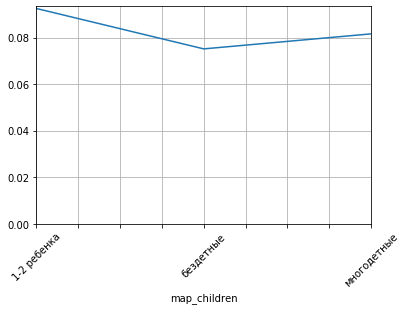

In [ ]:
#Построим график по сводной таблице, где у-доля задолженностей по возврату кредитов,
#а х- количество детей

df.groupby('map_children')['debt'].mean().plot(ylim=0,rot=45,grid=True)

In [ ]:
#Определим, какие семейные статусы существуют в наших данных, и найдем зависимость
#от наличия кредитных задолженностей

df['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [ ]:
df.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
в разводе,1195,0.071130
вдовец / вдова,960,0.065625
гражданский брак,4177,0.092890
женат / замужем,12380,0.075202
не женат / не замужем,2813,0.097405


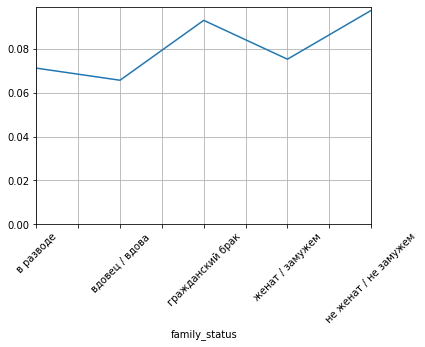

In [ ]:
#Построим график по сводной таблице, где у- доля задолженностей по возврату кредитов,
#а х- семейный статус

df.groupby('family_status')['debt'].mean().plot(ylim=0,rot=45,grid=True)

In [ ]:
#Вычислим среднее в уровне дохода заемщиков, но для начала определим, есть ли у нас миллиардеры
df['total_income'].max()

2265604

In [ ]:
#Нет, есть только миллионеры, поэтому можем считать методом среднего арифметического
df['total_income'].mean()

150890.93591355783

In [ ]:
#Так мы нашли средний доход. Поделим уровень дохода на категории, где
#0-50 - низкий, 51-90 - ниже среднего, 91-180 - средний, 181-300 - выше среднего, больше 301 - высокий

def income_map(income):
     
        if income <= 50000:
                return 'низкий'
        if income <= 90000 and income >= 51000:
                return 'ниже среднего'    
        if income <= 180000 and income >= 91000:
                return 'средний'
        if income <= 300000 and income >= 181000:
                return 'выше среднего'    
        
        return 'высокий'
    
df['income_raiting'] = df['total_income'].apply(income_map)  
df.groupby('income_raiting')['debt'].agg(['count','mean'])

,count,mean
income_raiting,,
высокий,1684,0.073040
выше среднего,4876,0.075677
ниже среднего,2940,0.080272
низкий,372,0.061828
средний,11653,0.084957


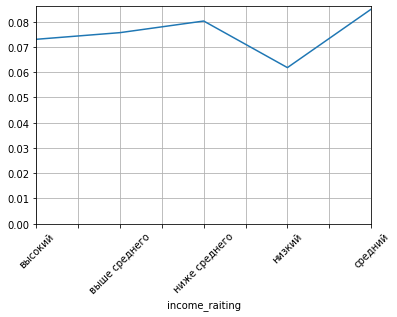

In [ ]:
#Построим график по сводной таблице, где у- доля задолженностей по возврату кредитов,
#а х- ежемесячный доход

df.groupby('income_raiting')['debt'].mean().plot(ylim=0,rot=45,grid=True)

In [ ]:
#Выясним, с какими кредитными целями заемщики имеют больше всего кредитных задолженностей

df.groupby('common_purpose')['debt'].agg(['count','mean'])

,count,mean
common_purpose,,
автомобиль,4315,0.093395
недвижимость,10840,0.072140
образование,4022,0.091994
свадьба,2348,0.079216


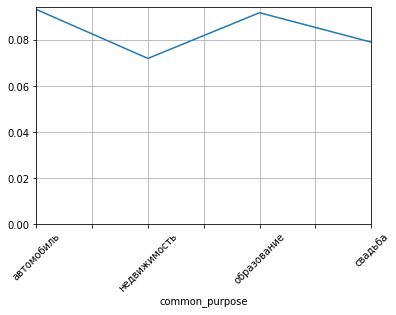

In [ ]:
#Построим график по сводной таблице, где у- доля задолженностей по возврату кредитов,
#а х- цели взятия кредита

df.groupby('common_purpose')['debt'].mean().plot(ylim=0,rot=45,grid=True)

**Вывод**

С промощью категоризации и визуализации данных мы смогли определить, какие заемщики не склонны отдавать кредиты в срок, а каким банк может доверять более охотно.

## Шаг 3. Ответы на вопросы заказчика

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

**Вывод**

Заемщики, не имеющие детей, более ответственно погашают кредиты, либо имеют для этого больше возможностей.
7,5% бездетных не выплачивали кредит в срок. Интересно то, что среди имеющих 1-2 ребенка должники составили 9,2%, а среди много детных меньше - 8,1%.
Возможные причины этому: иметь детей - это дорого. Дети чаще всего в приоритете по распределению бюджета. 
Их содержание, здоровье и образование не требует отлагательств, а банк может подождать. При этом многодетные семьи более организованы, чем те, у кого 1-2 ребенка.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Вывод**

Среди тех заемщиков, которые более склонны погашать кредит в срок, оказались люди, 
которые имеют или имели опыт узаконенных отношений:
вдовы и вдовцы - 6,5%
разведенные - 7,1%
женатые и замужние - 7,5%.
Клиенты, не находящиеся в браке или в гражданском браке имели долю задолженностей 9,7% и 9,2% соответственно.
Брак - лучшая школа по выращиванию ответсвенности!

**Вывод**

Есть ли зависимость между доходом и возвратом кредита в срок?

Более всего склонны не возвращать кредит в срок заемщики с доходом ниже 50000 руб., таких 6,1%.
Далее идут заемщики с доходом выше 300000 руб. (7,3%), 81000 - 300000 руб. (7,5%), 51000 - 90000 руб. (8%).
Самыми ненадежными заемщиками оказались клиенты со средним уровнем дохода, 91000 - 180000 руб., таких 8,4%.

- Как разные цели кредита влияют на его возврат в срок?

**Вывод**

Наиболее склонны к просрочке кредитных выплат клиенты, берущие кредиты на автомобили (9,3%) и образование (9,1%).
Автомобиль стремятся иметь все, независимо от условий жизни, уровня дохода и ответственности.
На образование, скорее всего, берут кредиты студенты или люди, желающие сменить или получить работу.
В этом случае велик шанс не успеть заработать достаточно средств на выплату кредита.
Самыми отвтетсвенными клиентами оказались клиенты, берущие кредит на операции с недвижимостью, 7,2%.
Такие действия сами по себе обязывают уметь обращаться с деньгами или тщательно просчитывать свои финансовые планы.
Клиенты, которые берут кредит на свадьбу, не возвращают его с срок в 7,9% случаев.

## Шаг 4. Общий вывод

Заемщики, не имеющие детей, более ответственно погашают кредиты, либо имеют для этого больше возможностей.
7,5% бездетных не выплачивали кредит в срок. Интересно то, что среди имеющих 1-2 ребенка должники составили 9,2%, а среди много детных меньше - 8,1%.
Возможные причины этому: иметь детей - это дорого. Дети чаще всего в приоритете по распределению бюджета. 
Их содержание, здоровье и образование не требует отлагательств, а банк может подождать. При этом многодетные семьи более организованы, чем те, у кого 1-2 ребенка.

Среди тех заемщиков, которые более склонны погашать кредит в срок, оказались люди, 
которые имеют или имели опыт узаконенных отношений:
вдовы и вдовцы - 6,5%
разведенные - 7,1%
женатые и замужние - 7,5%.
Клиенты, не находящиеся в браке или в гражданском браке имели долю задолженностей 9,7% и 9,2% соответственно.
Брак - лучшая школа по выращиванию ответсвенности!

Более всего склонны не возвращать кредит в срок заемщики с доходом ниже 50000 руб., таких 6,1%.
Далее идут заемщики с доходом выше 300000 руб. (7,3%), 81000 - 300000 руб. (7,5%), 51000 - 90000 руб. (8%).
Самыми ненадежными заемщиками оказались клиенты со средним уровнем дохода, 91000 - 180000 руб., таких 8,4%.

Наиболее склонны к просрочке кредитных выплат клиенты, берущие кредиты на автомобили (9,3%) и образование (9,1%).
Автомобиль стремятся иметь все, независимо от условий жизни, уровня дохода и ответственности.
На образование, скорее всего, берут кредиты студенты или люди, желающие сменить или получить работу.
В этом случае велик шанс не успеть заработать достаточно средств на выплату кредита.
Самыми отвтетсвенными клиентами оказались клиенты, берущие кредит на операции с недвижимостью, 7,2%.
Такие действия сами по себе обязывают уметь обращаться с деньгами или тщательно просчитывать свои финансовые планы.
Клиенты, которые берут кредит на свадьбу, не возвращают его с срок в 7,9% случаев.

В нашем исследовании мы увидели, что больше всего стоит доверять заемщикам:
без детей, имеющих опыт официального брака, с доходом выше 50000 рублей в месяц, берущих кредит на операции
с недвижимостью.
Больше всего задолженностей по кредитным выплатам имеют клиенты:
с детьми, не имеющие опыт узаконенных отношений, имеющие доход 91000 - 180000 рублей в месяц, берущих кредит на покупку автомобиля.
